# Linear Regression

Regression is often used to tackle supervised learning with continuous datasets. Here we introduce the simipliest form of regression, linear regression. You are likely faimilar with simple linear regression in which one fits a straight line to data on the plane. However, linear regression can be extended to model much more complicated behavior. High interpretability, ease of use, and quick computation makes linear regression an attractive starting point.

We will utilize Scikit-Learn to construct the linear regression models and will import methods as needed. For basic utility we will also import numpy, pandas, and matplotlib.

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot

# Simple Linear Regression

Given data points $(x_1,y_1),(x_2,y_2),\dots,(x_N,y_N)$ the task of linear regression is to construct a linear function $h$ that fits the data. This function is often called the hypothesis, hence the choice of letter. For the time being we will suppose $x_i\in\mathbb{R}$. Consider the following set of data points that's been primed for simple linear regression.

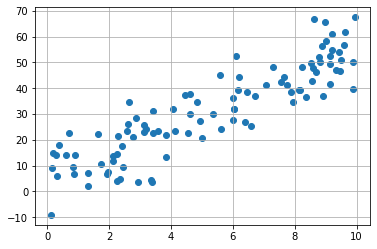

In [3]:
data = pd.read_csv("dataLinear.csv")
X = data.iloc[:,:-1].values
y = data.iloc[:,-1:].values

pyplot.scatter(X,y); pyplot.grid()

In simple linear regression we hypothesize that

$$h(x)=\theta_0+\theta_1x$$

is a resonable model for the data. The task is to then find $\theta=[\theta_0\; \theta_1]^T$ that fits the data the 'best'. There's any number of ways to evaluate the choice for $\theta$ but by far the most common evaluation is the squared error. In this way we would define a cost function to be

$$J(\theta)=\sum_{i=1}^{N}\left(h_{\theta}(x_i)-y_i\right)^2.$$

This is also known as the residual sum of squares (i.e. $J(\theta)=\text{RSS}$). Simple linear regression then finds $\theta$ that minimizes $J(\theta)$ in order to determine the model $h_\theta(x)$. It turns out that if the errors are independent and identically distributed and normal then the $\text{RSS}$ coincides with the maximum-likelihood estimates. Hence the choice of $\text{RSS}$ as a criterion for 'best' is often the most appropriate.

Scikit-Learn's LinearRegression method is able to perform all the necessary computation for us using the $\text{RSS}$ cost function.

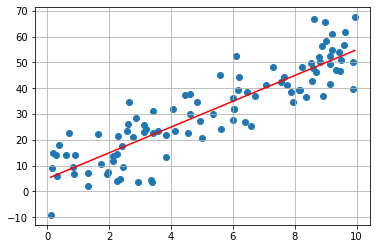

In [4]:
from sklearn.linear_model import LinearRegression
linModel = LinearRegression().fit(X,y)

xFit = np.linspace(X.min(),X.max(),1000).reshape(1000,1)
yFit = linModel.predict(xFit)

pyplot.scatter(X,y); pyplot.grid()
pyplot.plot(xFit,yFit,'r');

## Multi-Dimensional Linear Regression

In the previous example we assumed only a single feature, i.e. that $x_i\in\mathbb{R}$. Suppose instead that we have $D$ features so that $x_i=[x_{i,1}\; x_{i,2}\; \cdots \; x_{i,D}]^T\in\mathbb{R}^D$. Now our hypothesis function $h\colon\mathbb{R}^D\to\mathbb{R}$ has the form

$$h(x_i)=\theta_0+\theta_1x_{i,1}+\theta_2x_{i,2}+\cdots+\theta_Dx_{i,D}$$.

Let $\theta=[\theta_0\; \theta_1\; \cdots\; \theta_D]^T$ and $x=[x_{\cdot,0}\; x_{\cdot,1}\; \cdots \; x_{\cdot,D}]^T$ where $x_{\cdot, 0}=1$ is given. Then $h_\theta(x)=\theta^Tx$. The $\text{RSS}$ is still used as our cost function.

In the following example we have three features. By just populating a matrix $X$ with the data Scikit-Learn's LinearRegression method is able to compute the vector $\theta$ just like before.

In [5]:
data = pd.read_csv("dataLinearMulti.csv")
X = data.iloc[:,:-1].values
y = data.iloc[:,-1:].values

linModel = LinearRegression().fit(X,y)

Instead of fitting a line onto a plane we have fit a hyperplane onto $\mathbb{R}^4$. There's a plethera of ways to evaluate the fit of the model. The following gives the coefficient vector $\theta$ and some basic metrics using Scikit-Learn's metrics method.

In [6]:
from sklearn import metrics

print("Theta = ", np.concatenate((linModel.intercept_,linModel.coef_.reshape(3))))
print("R2 Error: ", metrics.r2_score(y,linModel.predict(X)))
print("Mean Absolute Error: ", metrics.mean_absolute_error(y,linModel.predict(X)))
print("Mean Squared Error: ", metrics.mean_squared_error(y,linModel.predict(X)))
print("Max Error: ", metrics.max_error(y,linModel.predict(X)))

Theta =  [ 2.27296944  2.02327062 -4.04753154  1.01483598]
R2 Error:  0.9950806322585403
Mean Absolute Error:  0.7697123470407508
Mean Squared Error:  0.8878728515048789
Max Error:  2.6052742566936464


# Regression with Basis Functions

Similar to how simple linear regression can be extended to include multiple features, we can generalize the model further to consider regression with basis functions. That is, we will suppose that $h_\theta(x)$ takes the form

$$h_\theta(x)=\sum_{i=0}^P\theta_i\phi_i(x)$$

where the basis functions $\phi_i\colon\mathbb{R}^D\to\mathbb{R}$ are given. The task of linear regression is to determine the real coefficients $\theta_0,\theta_1,\dots,\theta_P$. Again we will often use the $\text{RSS}$ to determine $\theta$.

The coefficient $\theta_0$ is often called the bias coefficient and we define $\phi_0(x)=1$. In simple linear regression we take $\phi_1(x)=x$. Defining linear regression in this way emphasizes its flexibility. The majority of behavior in any data set can be modeled by simply tuning the $\phi_i$ functions. It's also important to observe that we call this linear regression because the hypothesis is linear in $\theta$ while not necessarily being linear in $x$.

## Polynomial Regression

Suppose we wish to use the following polynomial hypothesis

$$h_\theta(x)=\theta_0+\theta_1x_{\cdot,1}+\theta_2x_{\cdot,2}^3+\theta_3x_{\cdot,1}^2x_{\cdot,2}$$

where each $x_i$ has two features, $x_{i,1}$ and $x_{i,2}$. Then we set $\phi_0(x)=1$, $\phi_1(x)=x_{\cdot,1}$, $\phi_2(x)=x_{\cdot,2}^3$, and $\phi_3(x)=x_{\cdot,1}^2x_{\cdot,2}$ and perform linear regression just as before. Any polynomial representation of $h_\theta(x)$ can be given by defining $\phi_i$ as needed.

Scikit-Learn's PolynomialFeatures method can create a polynomail of any given degree. Using this along with Scikit-Learn's make_pipline method we can fit a 5th degree polynomial to a set of data.

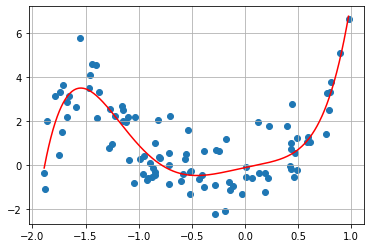

In [7]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

data = pd.read_csv("dataPolynomial.csv")
X = data.iloc[:,:-1].values
y = data.iloc[:,-1:].values

polyModel = make_pipeline(PolynomialFeatures(5),LinearRegression())
polyModel.fit(X,y)

xFit = np.linspace(X.min(),X.max(),1000).reshape(1000,1)
yFit = polyModel.predict(xFit)

pyplot.scatter(X,y); pyplot.grid()
pyplot.plot(xFit,yFit,'r');

This shows that linear regression can fit models to even nonlinear data.

## Regression with Gaussian RBFs

To further emphasize the versatility of linear regression we consider one last interesting choice for our basis functions, the Gaussian radial basis functions (RBF). Define

$$\phi_i(x)=k(x_i,x)=e^{-\left\lVert x-x_i\right\rVert^2/(2\sigma^2)}$$

where $\sigma$ is some given variance parameter. Although not necessary, we have chosen the centers of our RBF to be equal to the points $x_i$. Our hypothesis function is then a linear combination of $N$ Gaussian distributions each centered at a distinct $x_i$.

The Gaussian RBF is a particular kernel, hence the notation of $k(x_i,x)$. There's many more popular kernels, some RBFs some not, that can be used for regression. Scikit-Learn has a built in method for Gaussian RBF regression, GaussianProcessRegressor. This method takes a parameter $\verb|kernel|$ but with none specified it uses the standard Gaussian RBF with $\sigma=1$.

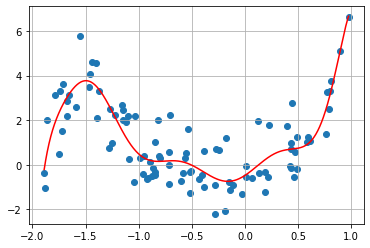

In [8]:
from sklearn.gaussian_process import GaussianProcessRegressor

data = pd.read_csv("dataGaussian.csv")
X = data.iloc[:,:-1].values
y = data.iloc[:,-1:].values

gaussModel = GaussianProcessRegressor().fit(X,y)

xFit = np.linspace(X.min(),X.max(),1000).reshape(1000,1)
yFit = gaussModel.predict(xFit)

pyplot.scatter(X,y); pyplot.grid()
pyplot.plot(xFit,yFit,'r');

# Regularization

Adding more basis functions leads to more $\theta_i$s to solve and most often an overfit model. Suppose we have 25 data values and wish to use polynomial regression to model the data. The larger the degree of polynomial that's used the better the model will fit the given data. Although the resulting model will likely result in a poor predictor for other values.

For example, using Scikit-Learn we model 30 points using a 25th degree polynomial. The resulting model is a good fit to the given data but demonstrates large oscillator behavior. This would probably be a very poor model to predict values for.

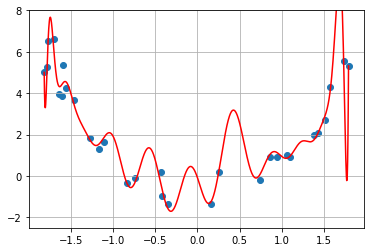

In [9]:
data = pd.read_csv("dataReg.csv")
X = data.iloc[:,:-1].values
y = data.iloc[:,-1:].values

polyModel = make_pipeline(PolynomialFeatures(25),LinearRegression())
polyModel.fit(X,y)

xFit = np.linspace(X.min(),X.max(),1000).reshape(1000,1)
yFit = polyModel.predict(xFit)

pyplot.scatter(X,y); pyplot.grid()
pyplot.plot(xFit,yFit,'r'); pyplot.ylim([-2.5,8]);

## Ridge Regression

There are two main ways to combat over-fitting model. Either removing the number of features used in our model (i.e. reducing the degree of the polynomial), or by decreasing the size of the parameters. The later method is known as regularization. By reducing $\theta_i$ we are reducing the influence of $x_i$ in our model. Doing this for every $x_i$ leads to a model that is less prone to volitility.

In ridge regression we take the cost function to our linear model and add a regularization term. Our new cost function is then

$$J(\theta)=\sum_{i=1}^{N}\left(h_{\theta}(x_i)-y_i\right)^2+\alpha\sum_{i=1}^N\theta_i^2.$$

Now when we try to find $\theta$ that minimizes $J(\theta)$ the regularization term will cause each $\theta_i$ to be smaller than before. Here $\alpha$ is called the regularization parameter and controls how much we penalize the size of each $\theta_i$.

SciKit-Learn has a built in estimator called Ridge. Below we plot the model and the corresponding coefficients for 3 values of $\alpha$.

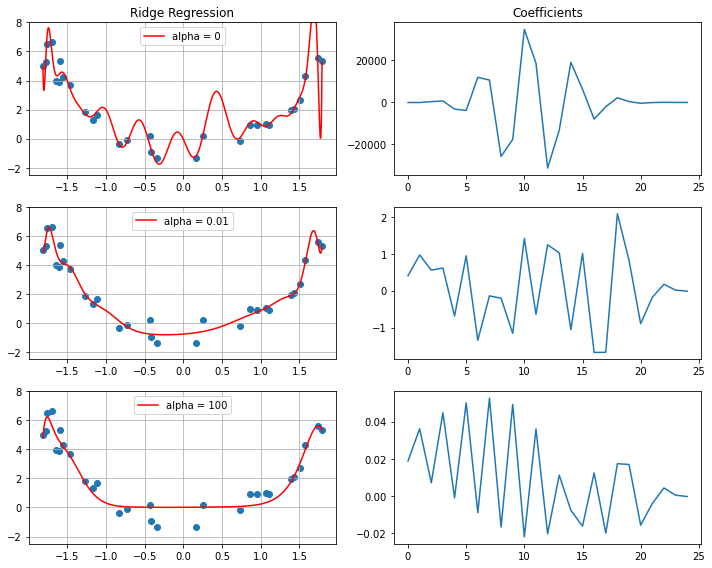

In [13]:
from sklearn.linear_model import Ridge

data = pd.read_csv("dataRegularization.csv")
X = data.iloc[:,:-1].values
y = data.iloc[:,-1:].values

xFit = np.linspace(X.min(),X.max(),1000).reshape(1000,1)

fig, axis = pyplot.subplots(3,2, figsize=(10,8))
for count, a in enumerate([0, 0.01, 100]):
    polyModel = make_pipeline(PolynomialFeatures(25),Ridge(alpha=a,max_iter=1e6))
    polyModel.fit(X,y)
    
    axis[count,0].scatter(X,y); axis[count,0].grid()
    axis[count,0].plot(xFit,polyModel.predict(xFit),'r')
    axis[count,0].legend(["alpha = "+str(a)],loc="upper center")
    axis[count,0].set_ylim([-2.5,8])
    axis[count,1].plot(polyModel.steps[-1][1].coef_.reshape(26)[1:])

axis[0,0].title.set_text("Ridge Regression"); axis[0,1].title.set_text("Coefficients");
pyplot.tight_layout()

When $\alpha=0$ no regularization is done and the resulting model is identical to our polynomial model. When we increase $\alpha$ we smooth the model since each degree of the polynomial we're using has less influence on the resulting model. When $\alpha$ is too big the model appears to under-fit the data since too much smoothing occured. In summary, regularization is causing a smoothing effect and can reasonably combat over-fitting for an appropriate value of $\alpha$.

## Lasso Regression

Another way to regularize our model is via Lasso regression. Instead of penalizing the square of $\theta_i$ in Ridge regression we penalize the absolute value of $\theta_i$. The cost function for Lasso regression is

$$J(\theta)=\sum_{i=1}^{N}\left(h_{\theta}(x_i)-y_i\right)^2+\alpha\sum_{i=1}^N|\theta_i|.$$

Scikit-Learn has an estimator for Lasso regression too. Using this we can plot our polynomial regression model with Lasso regularization for three values of $\alpha$.

In [11]:
import warnings
warnings.filterwarnings("ignore")

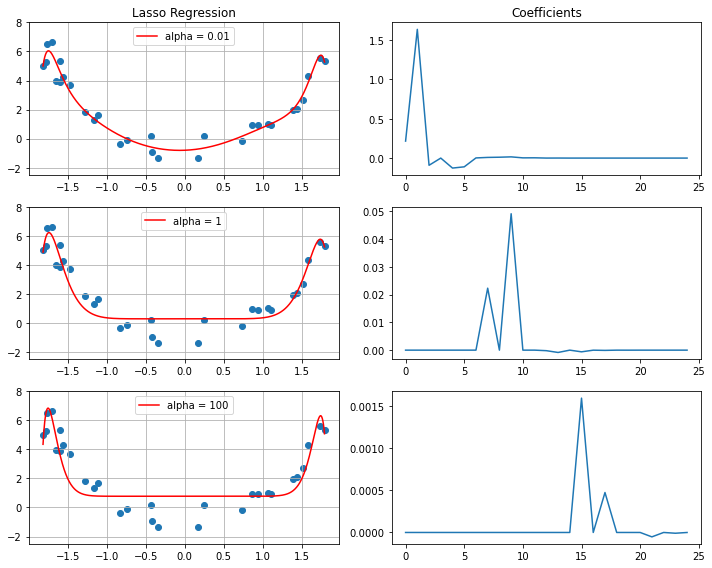

In [14]:
from sklearn.linear_model import Lasso

data = pd.read_csv("dataRegularization.csv")
X = data.iloc[:,:-1].values
y = data.iloc[:,-1:].values

xFit = np.linspace(X.min(),X.max(),1000).reshape(1000,1)

fig, axis = pyplot.subplots(3,2, figsize=(10,8))
for count, a in enumerate([0.01, 1, 100]):
    polyModel = make_pipeline(PolynomialFeatures(25),Lasso(alpha=a,max_iter=1e3))
    polyModel.fit(X,y)
    
    axis[count,0].scatter(X,y); axis[count,0].grid()
    axis[count,0].plot(xFit,polyModel.predict(xFit),'r')
    axis[count,0].legend(["alpha = "+str(a)],loc="upper center")
    axis[count,0].set_ylim([-2.5,8])
    axis[count,1].plot(polyModel.steps[-1][1].coef_.reshape(26)[1:])

axis[0,0].title.set_text("Lasso Regression"); axis[0,1].title.set_text("Coefficients");
pyplot.tight_layout()

The behavior in Lasso regression is similar to that of Ridge regression. Although in Lasso regression we see that more of the parameters are being set to zero. That is, Lasso regularization causes some features to be removed from the model completely. Instead of removing parameters via Lasso regularization, we usually use a feature selecting algorithm and Ridge regression to create a well fit model.